# Student Name: Taryn Nicole Michael
# Student Number: 201800323
# Advanced Machine Learning Semester Project
# Sol Plaatje University
# 2021

<hr style="border:2px solid black"> </hr>

# Problem Description
---

## Scenario
I have a start-up company that has identified a market for developing Machine Learning Web 
Applications, which are accessible to every person on a mobile phone. One of the high-priority areas for the start-up is to solve health-related challenges by building a web-based 
machine learning solution which can help health practitioners solve the problem of Heart 
Disease Diagnosis.

In building this solution my start-up has access to open-source data 
with 13 feature measurements collected from 𝑛 number of patients. Full access to the description of the data can be found on https://archive.ics.uci.edu/ml/datasets/Heart+Disease/ however; in this project, my start up will use a subset of the data which is provided in the repository. 

# Business Question and main functional requirement 
How can the start-up business use the dataset in Figure 1 to build an intelligent Web-based Application system that can diagnose a patient with outcomes sick (1) or not sick
(0)? While one of the functional requirements is to perform diagnosis, the clients would 
also like to know how can they trust this artificial intelligent system. Thus, one of the 
additional functional requirements would be that the system must be able to refer the 
matter to a medical expect if uncertain about the diagnosis. Similarly, the system must be 
able to quantify its certainty about a diagnosis.  

# Problem statement
Heart disease is a prevalent problem in health care and requires the automation of classifying heart disease in patients. This speeds up the diagnosis process which saves lives as diagnosing it too late could be fatal.


**Thus the problem can be defined as predicting whether a patient suffers from heart disease or not based on the Cleveland UCI dataset.**

##Objective:
1. Analyze data to better understand the data and how to tackle the problem.
2. Create a probabilistic model using Python and PYMC3 for predicting whether a patient suffers from heart disease or not.
3. Create a web framework using Django for deployment of the model, providing a UI for hospitals and doctors. The patient info will simply be fed into the system and it will return their results automatically, with its measurement of certainty/uncertainty.


# Project Tech Stack:

1. Front End
           HTML
        BOOTSTRAP

2. Back End
        Python
        Django
        GitHub

## Description of Heart Dataset
----
The full dataset contains 76 attributes. However, for the purposes of this project, only a subset of 14 attributes will be utilized. The 'num' field is our target field, which indicates the presence of heart disease in the pateint. 
For ethical purposes, the names and any other personal information of the patients were not included in the dataset.

Below is the attribute information of the dataset being utilized:
<br/>
1. **Age**: Age in years
2. **Sex**: (1=male, 0=female)
3. **CP**: Chest pain type 
   <br/>(1 = typical angina, 2 = atypical angina, 3= non-anginal pain, 4 = asymptomatic)
4. **trestbps**: Resting blood pressure in mm Hg on admission to hospital
5. **chol**: Serum cholestoral in mg/dl
6. **fbs**: Fasting blood sugar > 120 mg/dl (1=true, 0=false)
7. **restecg**: Resting electrocardiographic results 
   <br/>(0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. **thalach**: Max heart rate achieved (actual value).
9. **exang**: Exercise induced angina (1=yes, 0=no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: Slope of peak exercise ST segment
    <br/>(1=unsloping, 2=flat, 3=downsloping)
12. **ca**: Number of major vessels (0-4) coloured by flourosopy
13. **thal**: Maximum heart rate achieved (ordinal)
14. **target**: diagnosis of heart disease (0,1)

# Data Wrangling

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import random
from operator import add
import seaborn as sns
from google.colab import files
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier



# Data Exploration and Analysis

In [17]:
Heartdata = files.upload()

Saving Heart.csv to Heart (1).csv


In [18]:
data = pd.read_csv('Heart.csv', delimiter= ';')

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Observations based on data description above

As can be seen above, the range (interval of values) for different variables differ vastly. This will later on cause problems as variables with larger range's tend to overpower a model. Thus before building our model later on we will standardize the data. 

We also observe that there appears to be no missing values as all variables contain the same amount of values. However, this observation will be confirmed with the is.null() function. 




In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking for null values:

In [23]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see, there are no null values. 

### Checking class balance of target variable:

We can determine whether we are working with class imbalance or not by looking at the number of postive and negative (have heart disease or not) cases of our target variable. If it represents one class much more than the other, our model will end up being more biased towards that particular class. E.g if there are much more cases whereby the patient did not have heart disease, the model will be better at predicting those cases and be bad at predicting that the person does in fact suffer from heart disease. 
If this is the case, we would need to implement some smoothing algorithm to balance the data.

In [24]:
#checking whether the target variable is balanced or not (it does not represent one class more than the other)
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

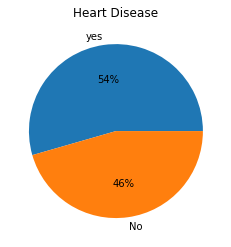

In [25]:
# Percentage of patients have and do not have heart disease
data['target'].value_counts()/data.shape[0]*100
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = data['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

165 Patients in the dataset have been recorded to suffer from heart disease whereas 138 do not. From the pie chart we can also see that 56% of the persons in the dataset have heart disease. It can thus be noted that we have a fairly well balanced target variable and there is no need for any further balancing to be done.

#### Distribution of patients' age

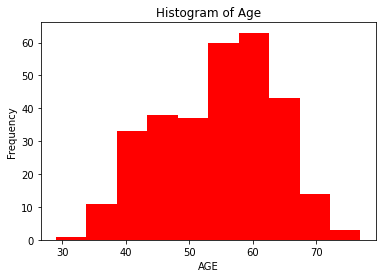

In [26]:
# Distribution of Age using Histogram
plt.hist(data.age, bins=10, color='red')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

It can be noted that the sample of patients contain more samples from patients who are between the ages of 55 and 65 than other age classes.

### Displaying distribution of classes for all categorical variables.

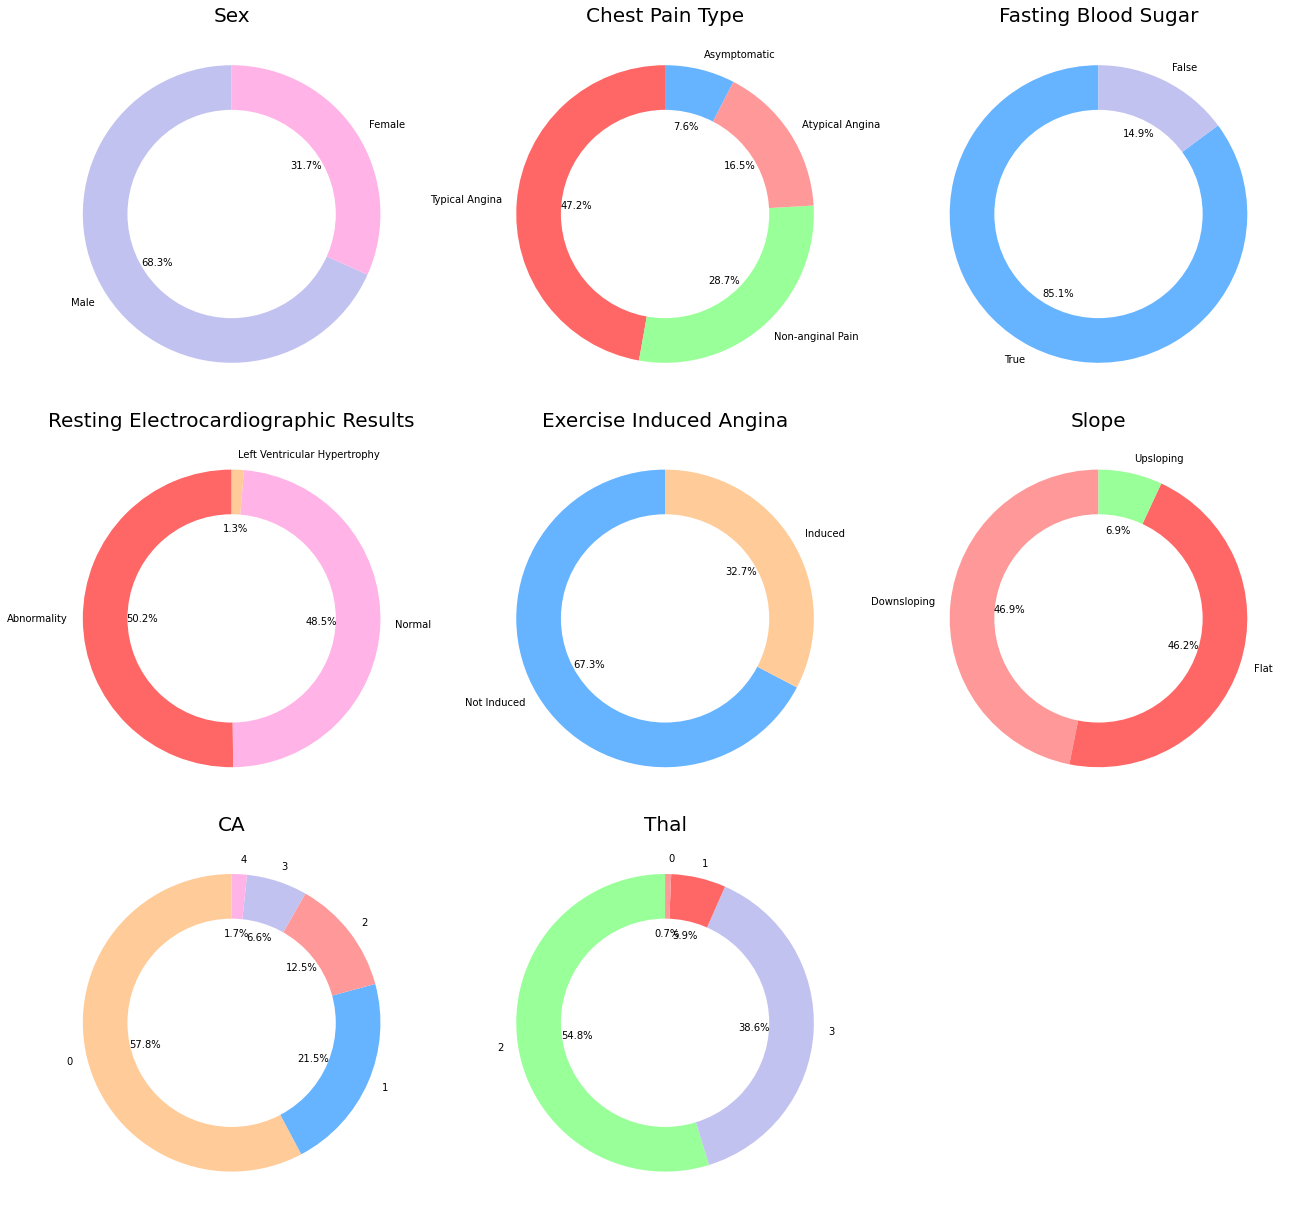

In [27]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    random.shuffle(default_colors)
    ax = data[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(data, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(data, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(data, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(data, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(data, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(data, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(data, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(data, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
plt.show()


#### Observations:

1. Majority of patients in the dataset are males (68.3%)
2. Majority of patients suffer from typical angina chest pain type (47.2%) whereas minority suffer from Asymptomatic chest pain (7.6%)
3. Majority of patients in the dataset suffer from fasting blood sugar (85.1%)
4. Majority of patients Resting electrocardiographix results display abnormalities.

## Correlations
The correlation matrix allows one to observe the correlations between all the variables. I.e. it allows oneto detect whether a variable is positively or negatively correlated with our target variable

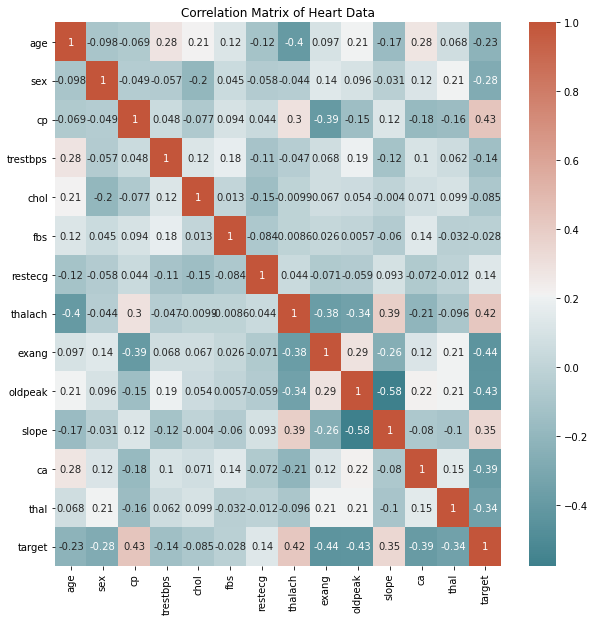

In [28]:
corrM = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrM,xticklabels=corrM.columns,yticklabels=corrM.columns,
            annot=True,cmap=sns.diverging_palette(210,20,as_cmap=True))
plt.title('Correlation Matrix of Heart Data')
plt.show()

As can be seen above, there is a strong positive correlation between cp (chest pain) and target. This makes sense as greater amounts of chest pains result in greater chances of having heart disease.

Thalach (max heart rate achieved) also appears to have a positive correlation with target. This makes medical sense too as the higher your heart rate, the more likely you are to suffer from heart disease.

Exang and oldpeak both have negative correlations with target.

### Target Variable vs Categorical Variables

In [29]:
def create_percent_stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#019600', '#3C5F5A', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

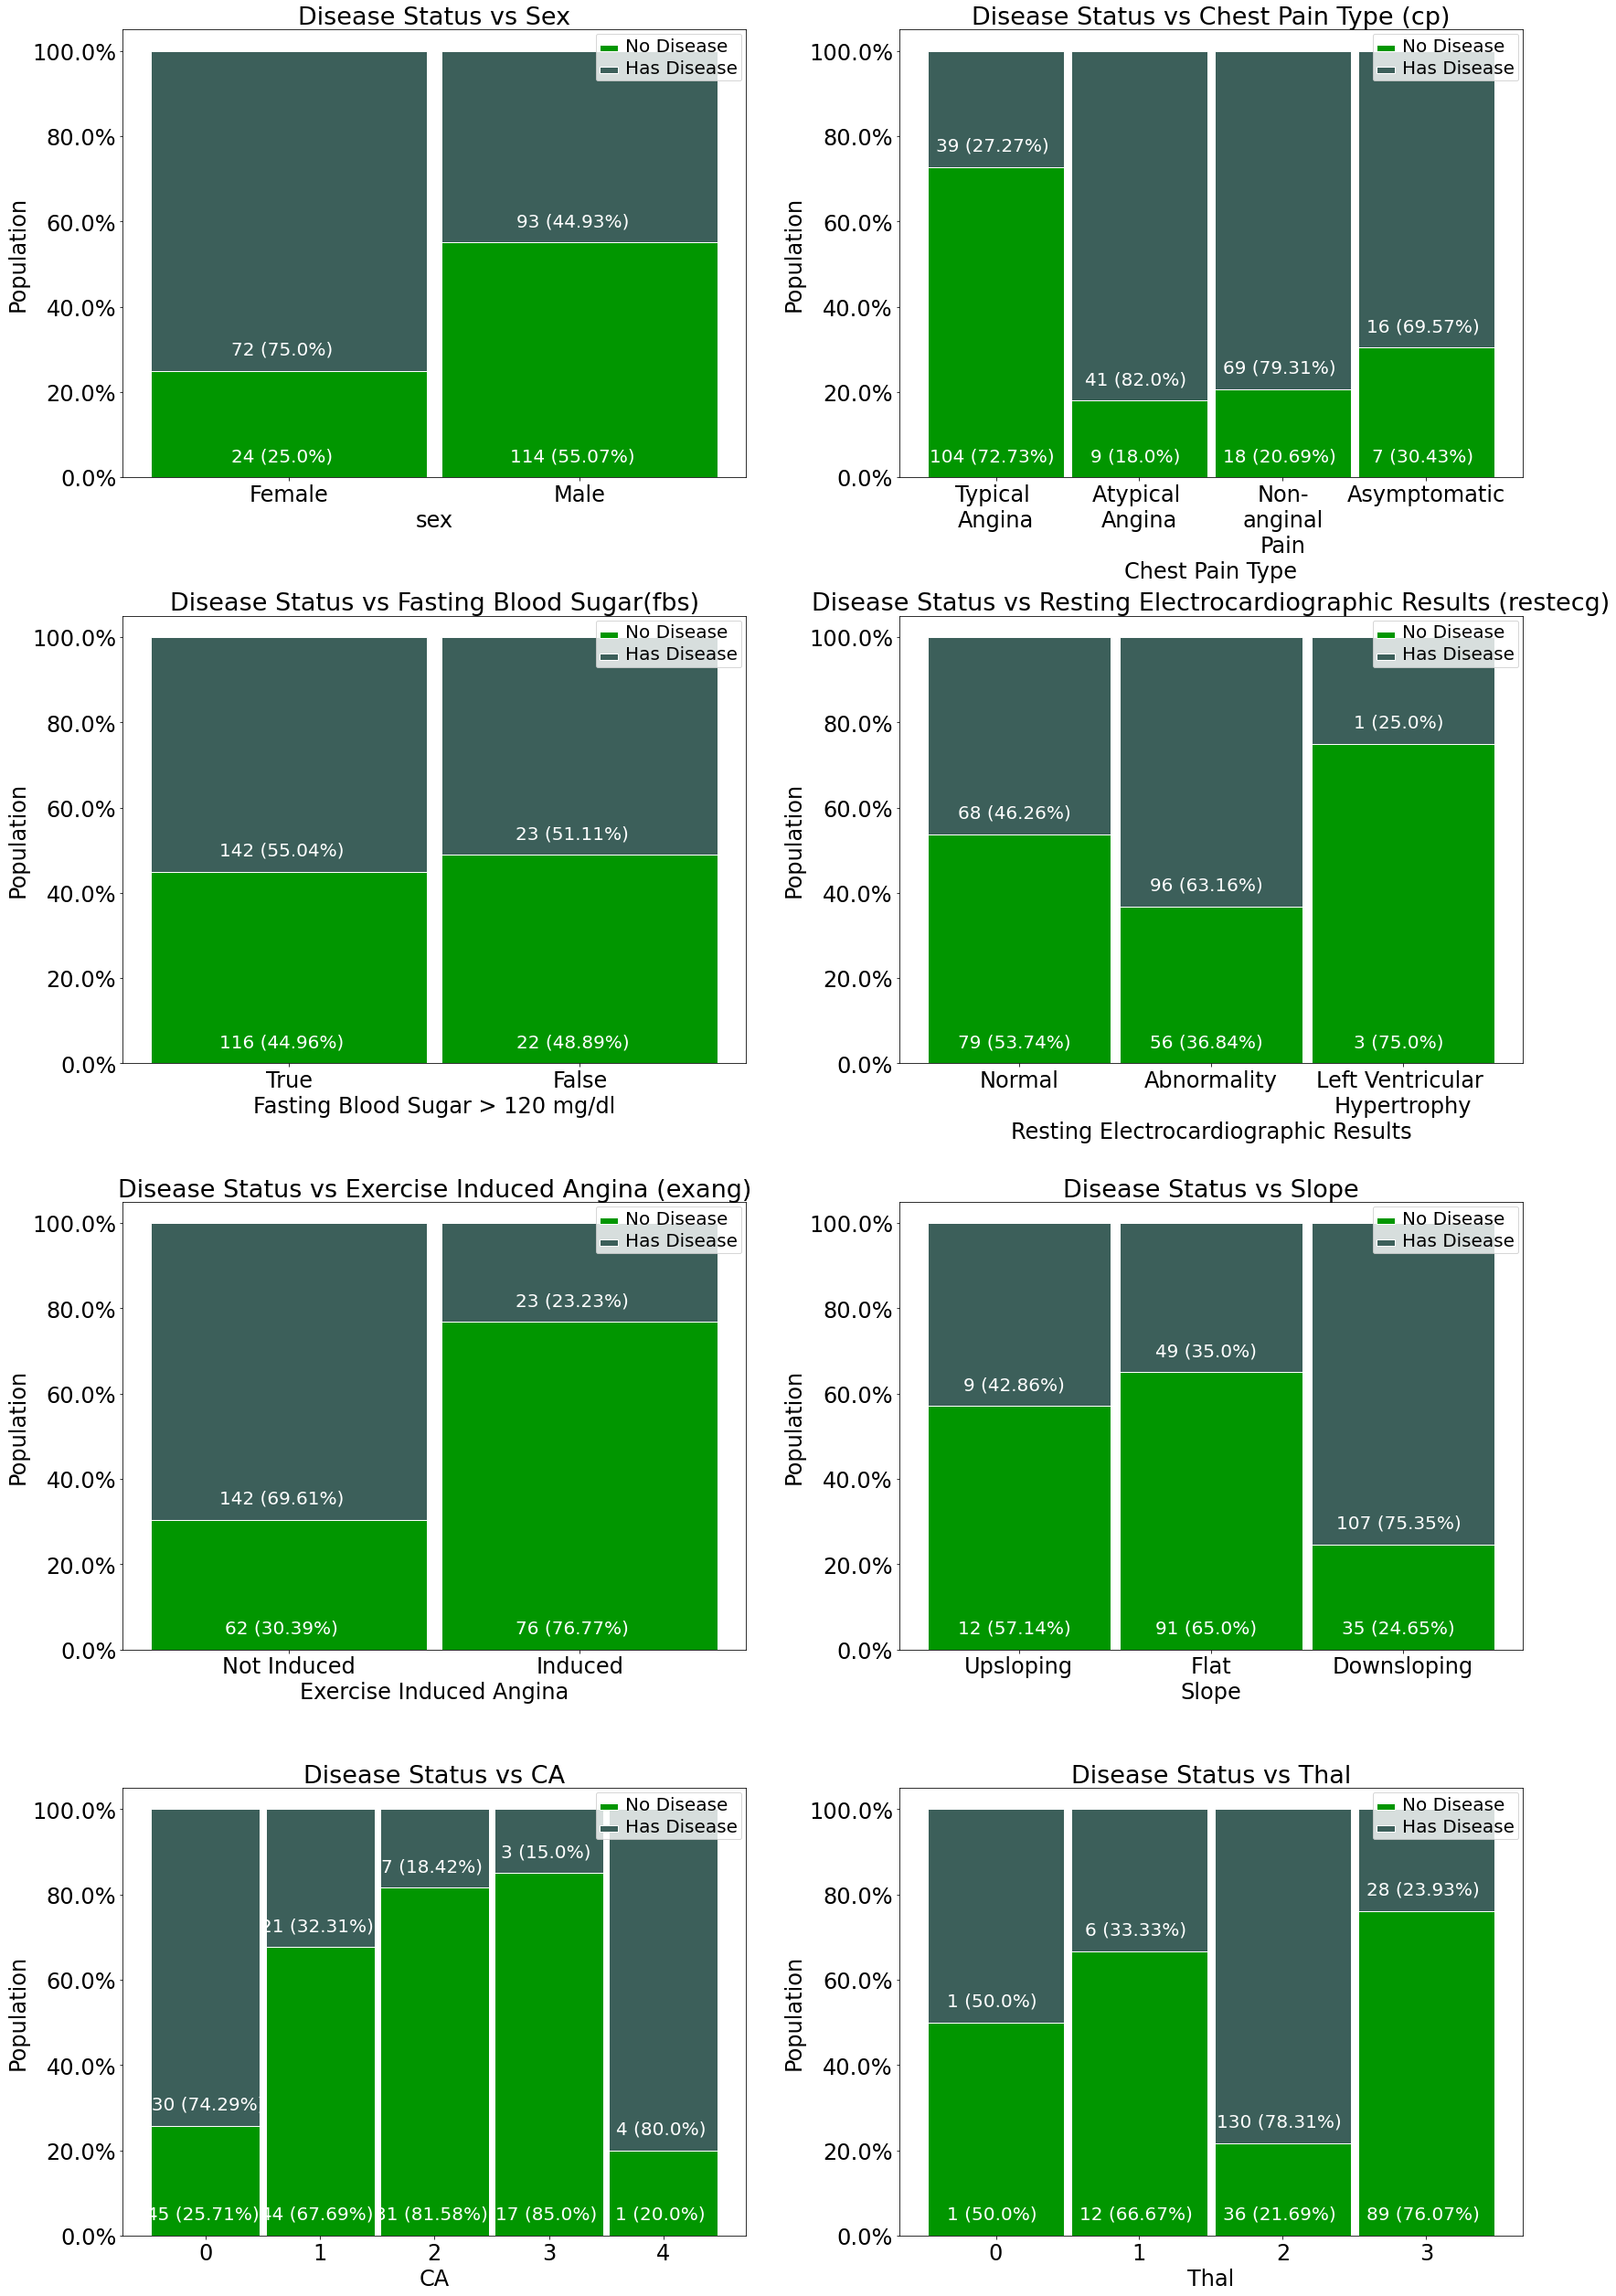

In [30]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 4
grid_cols = 2

# Draw Disease Status vs Sex chart
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Sex', ylabel = 'Population')

# Draw Disease Status vs Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['cp','target']].groupby(['cp','target']).size().unstack('target')
temp.rename(index={0:'Typical \nAngina', 1:'Atypical \nAngina', 2:'Non-\nanginal\nPain',3:'Asymptomatic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Chest Pain Type (cp)', ylabel = 'Population', xlabel = 'Chest Pain Type')

# Draw fbs - fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['fbs','target']].groupby(['fbs','target']).size().unstack('target')
temp.rename(index={0:'True', 1:'False'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Fasting Blood Sugar(fbs)', ylabel = 'Population', xlabel = 'Fasting Blood Sugar > 120 mg/dl')

# Draw restecg - resting electrocardiographic results chart
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['restecg','target']].groupby(['restecg','target']).size().unstack('target')
temp.rename(index={0:'Normal', 1:'Abnormality', 2:'Left Ventricular \nHypertrophy'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Resting Electrocardiographic Results (restecg)', ylabel = 'Population', xlabel = 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina chart
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['exang','target']].groupby(['exang','target']).size().unstack('target')
temp.rename(index={0:'Not Induced', 1:'Induced'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Exercise Induced Angina (exang)', ylabel = 'Population', xlabel = 'Exercise Induced Angina')

# Draw slope - the slope of the peak exercise ST segment chart
plt.subplot(grid_rows, grid_cols, 6)
temp = data[['slope','target']].groupby(['slope','target']).size().unstack('target')
temp.rename(index={0:'Upsloping', 1:'Flat', 2:'Downsloping'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Slope', ylabel = 'Population', xlabel = 'Slope')

# Draw ca - number of major vessels (0-3) colored by flourosopy chart
plt.subplot(grid_rows, grid_cols, 7)
temp = data[['ca','target']].groupby(['ca','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs CA', ylabel = 'Population', xlabel = 'CA')

# Draw thal chart
plt.subplot(grid_rows, grid_cols, 8)
temp = data[['thal','target']].groupby(['thal','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Thal', ylabel = 'Population', xlabel = 'Thal')
fig.tight_layout()
plt.show()

### Observation:

**Disease Status (target) vs Sex** <br/>
Majority of female patients in dataset suffer from heart disease, whereas majority of the male patients in the dataset do not suffer from heart disease. This indicates that females are possibly more susceptible to heart disease than males.

**Disease Status vs Chest Pain Type (cp)** <br/>
Majority of patients suffering from typical angina chest pain do not suffer from heart disease. However, the majority of patients suffering from atypical angina, non-anginal pain, and asymptomatic chest pain suffer from heart disease. This leads to the induction that suffering from those three types of chest pain are more susceptible to heart disease than those suffering from typical angina chest pain.

**Disease Status vs Fasting Blood Sugar (fbs)** <br/>
Patients suffering from fasting blood sugar >
 mg/dl appear to have approximately the same probability of having heart disease than those who do not suffer from it. This could indicate that Fasting Blood Sugar is not a leading factor in determining whether one has heart disease or not.

 **Disease Status vs Resting Electrocardiographic Results (restecg)** <br/>
 Majority of patients whose results depicted having ST-T wave abnormalities appear to suffer from heart disease (63.16%). Thus these types of patients are more susceptible to heart disease. 
 Patients whose results came back 'normal' or indicated 'Left Ventricular Hypertrophy' do not appear to be as susceptible to heart disease since majority of the patients belonging to those two categories do not suffer from heart disease.

**Disease Status vs Exercise Induced Angina** <br/>
Patients suffering from Exercise induced Angina appear to be less susceptibe to heart disease than those not suffering from it. This can be observed from the graph whereby majority of those suffering from it do not have heart disease (76.77%), whereas majority of patients not having exercise induced angina have heart disease (69.01%).

**Disease Status vs Slope of peak exercise ST segment (Slope)**
<br/>
Patients whose peak exercise ST segment slope appears to be downsloping have the highest probability of suffering from heart disease as compared to patients whose slope is flat or upsloping. This is deduced from the fact that majority of those whose slope is downsloping suffer from heart disease (75.35%) whereas majority whose slope is flat or upsloping do not suffer from heart disease (65.0% and 57.14% respectively.)

**Disease Status vs CA (Num of major vessels (0-4) coloured by flourosopy**
<br/>
Patients who have either 0 or 4 major vessels coloured by flourosopy are more likely to suffer from heart disease. This is because it can be seen that majority of patients who have 0 or 4 major vessels coloured suffer from heart disease (74.29% and 80.0% respectively). Majority of patients who have 1 to 3 major vessels coloured do not suffer from heart disease so they are likely to have heart disease as compared to those with 0 or 4 major vessels coloured by flourosopy.

**Disease Status vs Thal (Max Heart Rate Achieved (0-3)**
<br/>

Patients whose Max Heart rate is class 2 are more likely to suffer from heart disease as compared to those whose max heart rate is class 0, 1, or 3. This is due to majority of patients in dataset whose max heart rate is classified 2 suffers from heart disease whereas for the other classes, the majority of patients do not suffer from heart disease.




We can further look at the relationship between continuous variables using pair plots as seen below:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

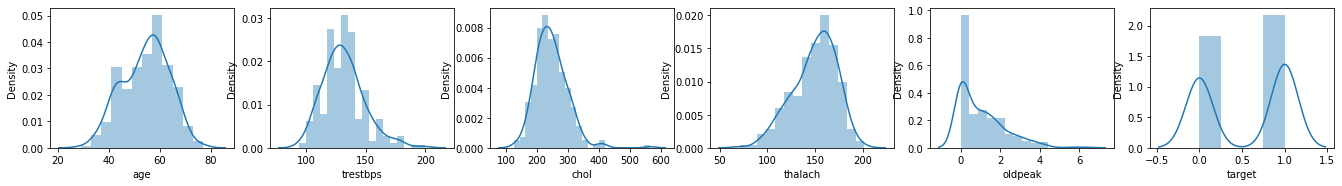

In [31]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_features)
number_of_rows = 5
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(data[f], kde=True)

The above plots demonstrate the density distribution plots of the continuous variables and target variables. 

We can note that the target variable appears to follow a bernoulli distribution and the distributions of the continuous variables appear to be skewed. We can standardize them later on to follow a normal distribution to make it easier to feed into our probabilistic model.

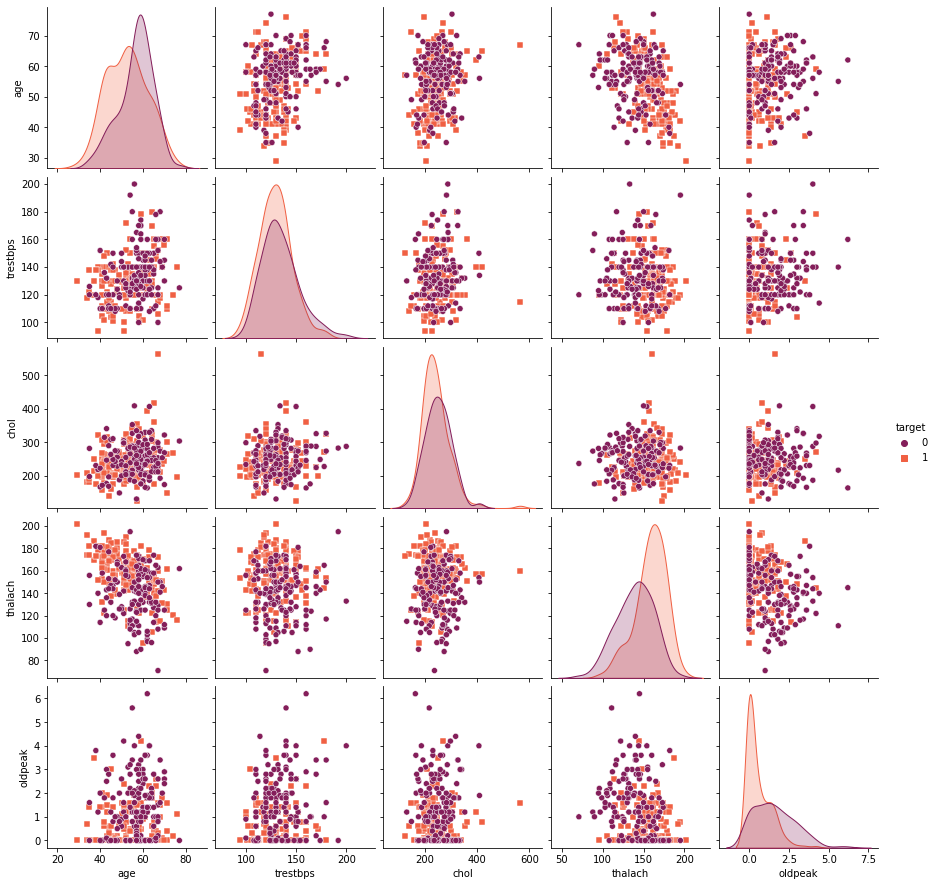

In [32]:
sns.pairplot(data, hue = 'target', markers=["o", "s"], vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], palette = sns.color_palette("rocket", 2))

### ST Depression induced by exercise relative to rest vs. Heart Disease

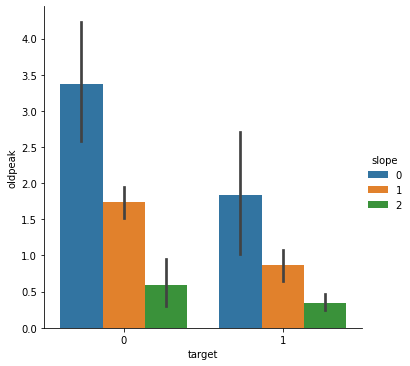

In [33]:
sns.catplot(x='target', y='oldpeak', hue='slope', kind='bar',data=data)

The plot above demonstrates that a low ST Depression yields patients to be at greater risk for heart disease whereas a high ST Depression is considered healthy and normal as patients are then far less likely to suffer from heart disease. This makes sense as the ST segment depression occurs when the ventricle is at rest and if the trace in the ST segment is abnormally low below the baseline as determined by medical experts, it can lead to heart disease.


The various slopes are displayed for positive and negative heart disease patients and it can be seen that the distribution of these different slopes are equal for both cases (patients who have heart disease and those who do not)

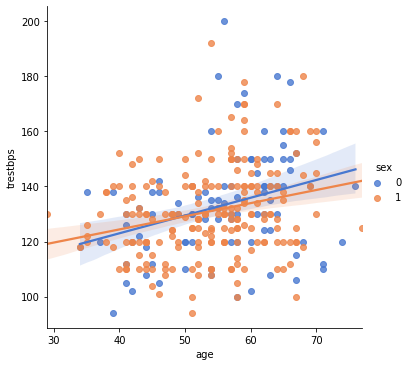

Correlation Coefficient:0.2793509065612883


In [34]:
# Plotting the Rest Blood Pressure against age and comparison between sex
sns.lmplot(x='age', y='trestbps', data=data, hue='sex', palette='muted')
plt.show()
print('Correlation Coefficient:{}'.format(np.corrcoef(data.age, data.trestbps)[0,1]))

There is a positive correlation between age and rest blood pressure. The Females tend to have slightly higher chance of high blood pressure than males post the age of 50

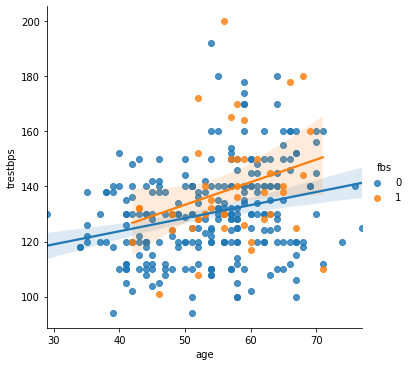

In [35]:
# Regression model between Resting Blood Pressure and Age and effect of blood sugar level of them
sns.lmplot(x='age', y='trestbps', data=data, hue='fbs')
plt.show()

Clearly, blood sugar level higher than 120 mg/dl increases the risk of blood pressure as age increases.

## Violin and Box Plots

Box and Violin plots shows the basic statistics of data as well as its distribution. This is often used for comparisons between the distibrutions of a specified variable across categories.

It demonstates the median, IQR, and Tukey's fence which is the minimum, first quartile (Q1), third quartile (Q3) and maximum.

It can also provide the outliers in the data.

Text(0, 0.5, 'Thalack Level')

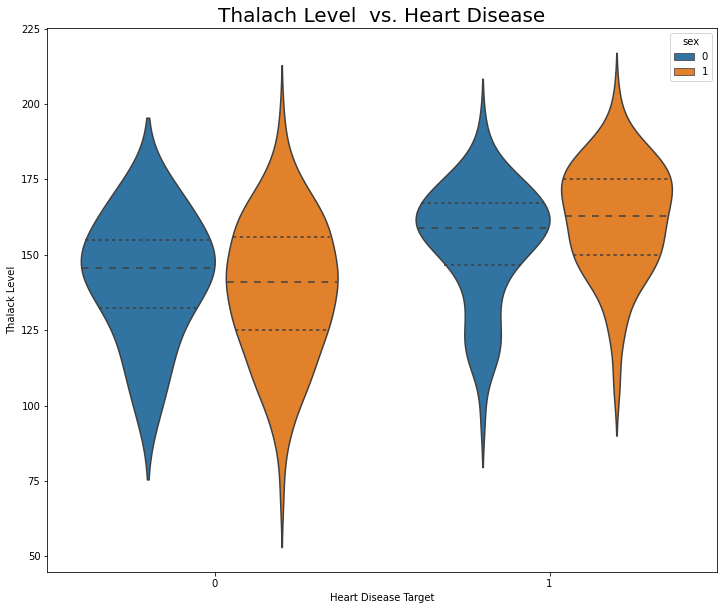

In [36]:
plt.figure(figsize=(12,10))
sns.violinplot(x='target', y='thalach', hue='sex', inner='quartile', data=data )
plt.title('Thalach Level  vs. Heart Disease', fontsize=20)
plt.xlabel('Heart Disease Target')
plt.ylabel('Thalack Level')

#### Observation:
Positive patients (suffer from heart disease) exhibit a heightened median for the maximum heart rate achieved (thalach level) while negative patients (do not suffer from heart disease) exhibit lower thalach levels.
Additionally, there are not many differences between male and female target outcomes other than the fact that makes have slightly larger ranges for thalach level.

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

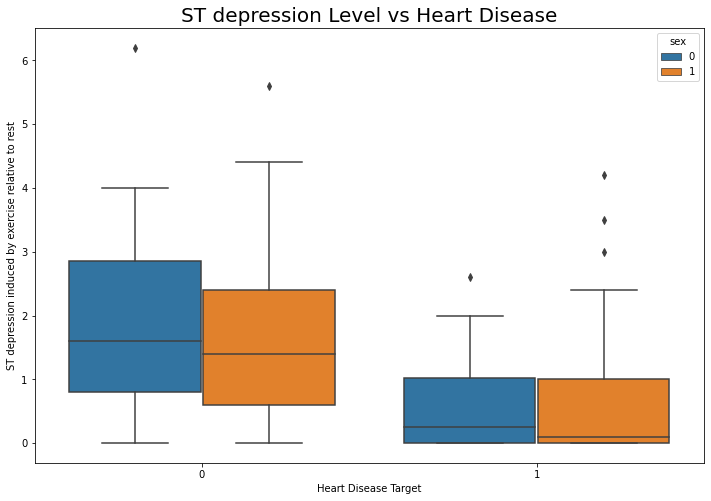

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='target', y='oldpeak', hue='sex', data=data)
plt.title('ST depression Level vs Heart Disease', fontsize=20)
plt.xlabel('Heart Disease Target')
plt.ylabel('ST depression induced by exercise relative to rest')

#### Observation
We can see that the overall distribution for positive and negative patients differ vastly. Positive patients exhibit fairly lower medians for ST depression levels results in majority of the distribution of their data lying between 0 and 2.

However, for negative patients, majority of their distribution lies between 1 and 3. Additionally, we once again do not see significant differences between male and female target outcomes. 
Outliers do appear to be present.

## Standardizing the data

To standardize the data, we scale the features to be normally distributed with a mean of zero and standard deviation of 1. This important since the data consists of various features with difference ranges of values and measures.

Not scaling the data would result in features with higher values dominating my model's performance and accuracy. It also removes possible outliers.

In [38]:
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Text(0.5, 1.0, 'Feature distribution before scaling')

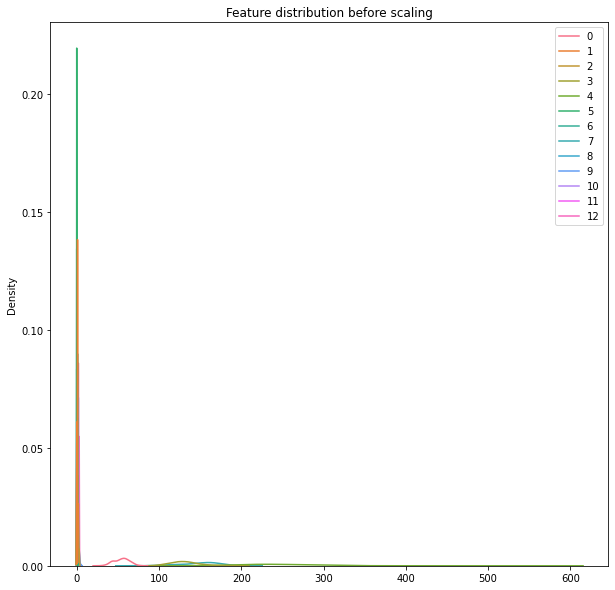

In [39]:
fig = plt.subplots(ncols=1, figsize=(10,10))
sns.kdeplot(data=x_train)
plt.title('Feature distribution before scaling')

We can observe above that the range for different variables differ vastly and standardization is needed

Text(0.5, 1.0, 'Feature distribution after scaling')

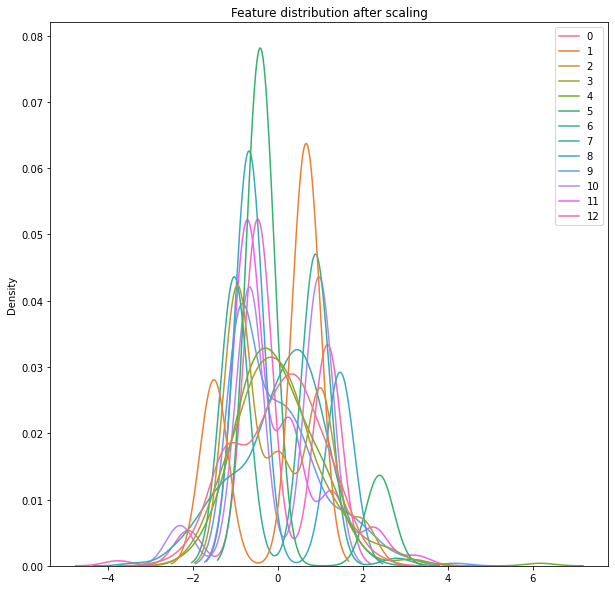

In [40]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)
fig = plt.subplots(ncols=1, figsize=(10,10))
sns.kdeplot(data=x_train)
plt.title('Feature distribution after scaling')

After standardizing our data, the variables are much more equally distributed (normally distributed) and a better fit for our model.

# Feature Selection
Feature selection involves manually or automatically selecting features which contribute the most to our predictor variable (target). This means selecting the features which assist the most in predicting whether the patient suffers from heart disease (1) or not (0). This is essential as having irrelevant features could decrease our model's accuracy. 

In [41]:
modelRF = RandomForestClassifier(random_state=1)
modelRF.fit(x_train, y_train)
y_pred = modelRF.predict(x_test)
print(classification_report(y_test, y_pred))
imp = modelRF.feature_importances_

for i,v in enumerate(imp):
  print('Feature: %0d, Score: %.5f' % (i,v))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


Text(0.5, 1.0, 'Features ranked by importance')

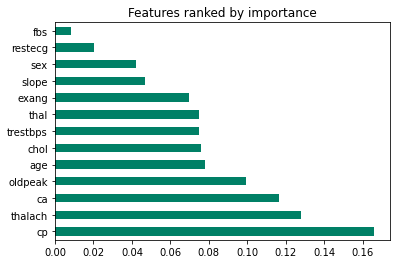

In [42]:
index = data.columns[:-1]
impPlot = pd.Series(imp, index=index)
impPlot.nlargest(13).plot(kind='barh', colormap='summer')
plt.title('Features ranked by importance')

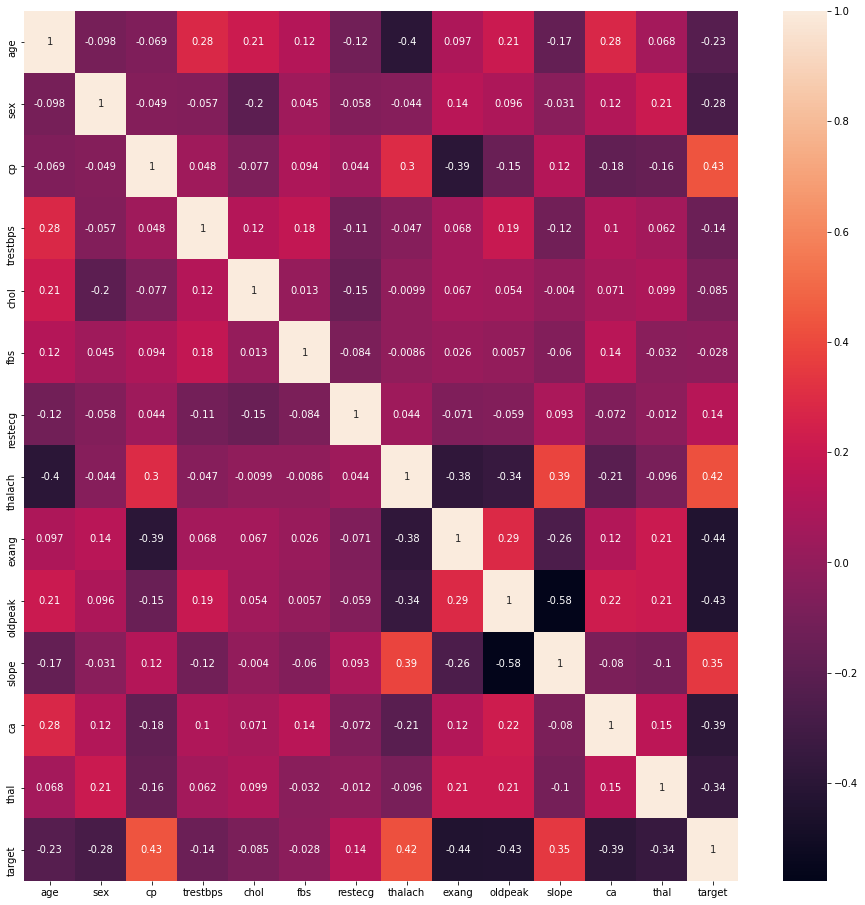

In [43]:
#Using heatmap
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,
                cmap = 'rocket')

We note that the correlation matrix is in alignment with the top ten most important features noted in the previous graph, with cp being the highest positively correlated feature with target, thalach the second highest, and exang being the highest negatively correlated feature to target.

**The top ten features based on importance are:
1. CP
2. thalach
3. CA
4. oldpeak
5. age
6. chol
7. trestbps
8. thal
9. exang
10. slope


We see that the lowest ranked feature is fbs. This supports our previous observations whereby fbs appears to have almost no effect on the target variable.

To simplify our model, we can only include the top 10 features and see how it compares to using all features of the dataset.

In [44]:
X_simp = data[['cp', 'thalach', 'ca', 'oldpeak', 'age', 'chol', 'trestbps', 'thal', 'exang', 'slope']]
y_simp = data.iloc[:,-1].values

In [45]:
from sklearn.model_selection import train_test_split
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_simp,y_simp,test_size=0.2,random_state=1)
modelRF_s = RandomForestClassifier(random_state=1)
modelRF_s.fit(x_train_s, y_train_s)
y_pred_s = modelRF_s.predict(x_test_s)
print(classification_report(y_test_s, y_pred_s))
imp_s = modelRF_s.feature_importances_

for i,v in enumerate(imp_s):
  print('Feature: %0d, Score: %.5f' % (i,v))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        30
           1       0.71      0.77      0.74        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

Feature: 0, Score: 0.18277
Feature: 1, Score: 0.14603
Feature: 2, Score: 0.12348
Feature: 3, Score: 0.11422
Feature: 4, Score: 0.08103
Feature: 5, Score: 0.09142
Feature: 6, Score: 0.07925
Feature: 7, Score: 0.07428
Feature: 8, Score: 0.07537
Feature: 9, Score: 0.03216


We see that the model performs better when using all features, thus we will not remove any features for our probabilisic model

# Probabalistic Model using PYMC3 for Heart Disease Prediction

When using probabilistic modelling, we find that our parameters are random variables. Thismeans that the probabilistic model will contain observed and unobserved random variables.

These observed variables are then defined using likelihood distributions and the unobserved variables are defined using prior distributions.


## Why Probabilistic Modelling?

Probabailistic models incorporate random variables and probability distributions into the model of an event or phenomenon. While a deterministic model gives a single possible outcome for an event, a probabilistic model gives a probability distribution as a solution. These models take into account the fact that we can rarely know everything about a situation. There’s nearly always an element of randomness to take into account.


Probabilistic programming (PP) allows flexible specification of Bayesian statistical models in code.

It also avoids data overfitting and provides easily interpretable models.

Reference: https://www.statisticshowto.com/probabilistic/#:~:text=While%20a%20deterministic%20model%20gives,know%20everything%20about%20a%20situation.&text=These%20models%20can%20be%20part%20deterministic%20and%20part%20random%20or%20wholly%20random.

In [46]:
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
import theano as tt
from theano.tensor import dot
from sklearn.preprocessing import StandardScaler, scale
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

PYMC3 is an open source Probabilistic programming framework allowing  flexible specification of Bayesian statistical models in code. It is intuitive and readable, yet powerful, syntax that is close to the natural syntax statisticians use to describe models. 

##Firstly, let us define our Model:
### Model Specification 



#### Priors:
Our priors are the features found within our dataset. When performing analysis we found it best to use all feature variables in our dataset after standardizing them as using all improves the model performance. 
Since the features are standardized, they are normally distributed with a mean of zero and a standard deviation of 1 which is specified in our model. However, these are simply estimates and thus when sampling our posterior we will be able to update our priors.

our mu is defined as $\alpha$ + $xtrain.\theta$

#### Posterior

Our posterior likelihood (target) is bernoulli since the patient either has heart disease or not. We model 'success' (1) as being the patient has heart disease in this project. The likelihood will be constructed in a way to represent a logistic regression problem.



For our predictions we use the sigmoid output function. This maps our predicted values to probabilities. We thus are provided with our measurement of uncertainty by the model e.g. 60% certain that the patient is suffering from heart disease instead of simply outputting that the patient is suffering from heart disease

In [47]:
with pm.Model() as LRmodel:
  #Priors
  theta = pm.Normal('theta', 0,1, shape=X.shape[1])
  alpha = pm.Normal('alpha', 0, 5)
  mu = alpha + pm.math.matrix_dot(x_train, theta)
  p_ = pm.Deterministic('p', pm.math.sigmoid(mu))
  y_obs = pm.Bernoulli('p-lik', p = p_, observed = y_train)
  
  trace_g = pm.sample(draws=1000)
  

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, theta]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.


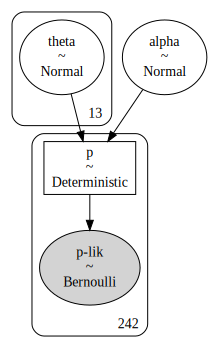

In [48]:
pm.model_to_graphviz(LRmodel)

In [49]:
az.summary(trace_g, var_names=['alpha'])

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.247,0.225,-0.185,0.65,0.004,0.004,2738.0,1488.0,1.0


For our model we have 

In [51]:
with LRmodel:
  ppc = pm.sample_posterior_predictive(trace_g)

In [52]:
y_ = ppc['p-lik'].mean(axis=0)

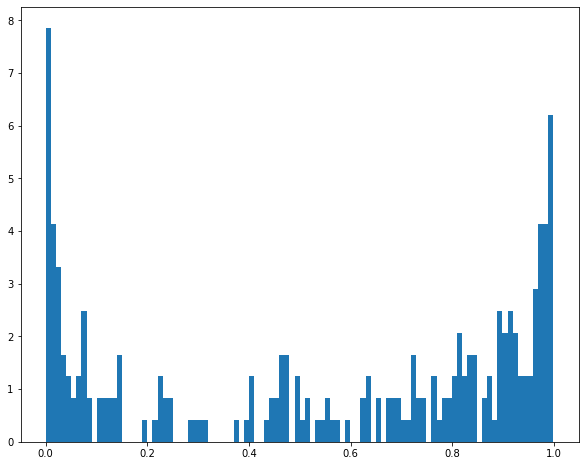

In [53]:
_,ax = plt.subplots(figsize=(10,8))
ax.hist(y_,bins=100, density=True)
plt.show()

In [54]:
y_

array([9.920e-01, 9.870e-01, 9.105e-01, 5.300e-01, 9.790e-01, 7.895e-01,
       1.125e-01, 2.270e-01, 2.500e-02, 9.095e-01, 9.775e-01, 1.500e-03,
       6.855e-01, 4.500e-03, 8.900e-01, 4.775e-01, 1.045e-01, 7.150e-02,
       7.550e-02, 9.185e-01, 9.020e-01, 4.500e-03, 5.585e-01, 8.365e-01,
       9.710e-01, 6.955e-01, 8.985e-01, 9.765e-01, 2.350e-02, 5.350e-02,
       5.010e-01, 4.490e-01, 6.000e-03, 9.955e-01, 2.050e-02, 6.560e-01,
       1.145e-01, 9.500e-01, 9.890e-01, 4.430e-01, 1.000e-03, 4.590e-01,
       9.340e-01, 2.500e-02, 1.425e-01, 7.885e-01, 6.500e-03, 8.380e-01,
       6.295e-01, 9.070e-01, 4.050e-01, 7.350e-01, 8.910e-01, 5.000e-04,
       7.455e-01, 3.775e-01, 8.460e-01, 4.500e-03, 4.900e-02, 4.675e-01,
       4.920e-01, 4.950e-02, 7.100e-01, 9.095e-01, 3.450e-02, 2.425e-01,
       9.825e-01, 3.965e-01, 6.345e-01, 8.930e-01, 7.070e-01, 8.170e-01,
       8.220e-01, 1.850e-02, 7.750e-01, 4.965e-01, 2.900e-02, 5.545e-01,
       1.100e-02, 9.010e-01, 1.650e-02, 8.500e-03, 

Model Convergence

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4429f92990>,
      dtype=object)

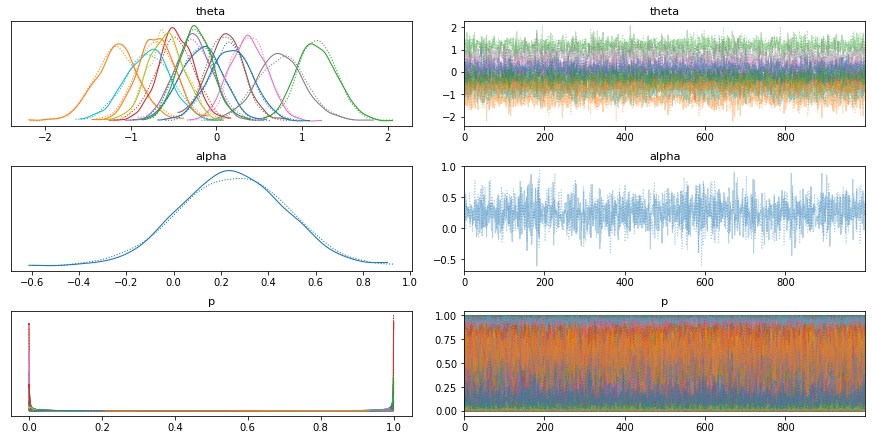

In [64]:
az.plot_trace(trace_g)

As shown in the output on the right, the sampled model parameters values are consisted in a specific range throughout the Markov chain Monte Carlo (MCMC) sampling process. We can thus determine that the model has converged.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



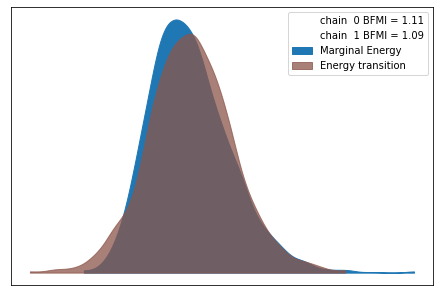

In [56]:
pm.energyplot(trace_g);

The energy above assists with evaluating problems of convergence. It provides a summary of how efficiently the random process explores the posterior. The marginal energy and energy transition distribution needs to be as close possible as an indication of the random process efficiently exploring the posterior distribution. If the energy transition distribution is much more narrow than the marginal energy, it means that, there is insufficient energy to explore the whole parameter space and that the posterior estimation is likely biased. From the plot above we determine that this is in fact not the case. We have sufficient energy

In [57]:
pred = np.array(([1 if x>0.5 else 0 if x<0.5 else 'Refer to doctor' for x in y_]))
len(pred[pred==1])/pred.size

0.5743801652892562

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_train, pred)

array([[ 90,  18],
       [ 13, 121]])

In [59]:
accuracy_score(y_train, pred)

0.871900826446281

##Posterior and Quantifying Uncertainty 

Credible intervals refer to the uncertainty present in the model. There are various methods for quantifying this credible interval such as the HDI as shown below. This indicates which points of the distribution are the most credible.

As can be seen below, the plots provide a 94% HDI. It indicates thus the subjective probability of a value with a 94% credible interval.

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

/usr/local/lib/python3.7/dist-packages/arviz/plots/plot_utils.py:496: UserWarning:

rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (256) in plot_posterior, generating only 40 plots



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f442c98f9d0>,
      dtype=object)

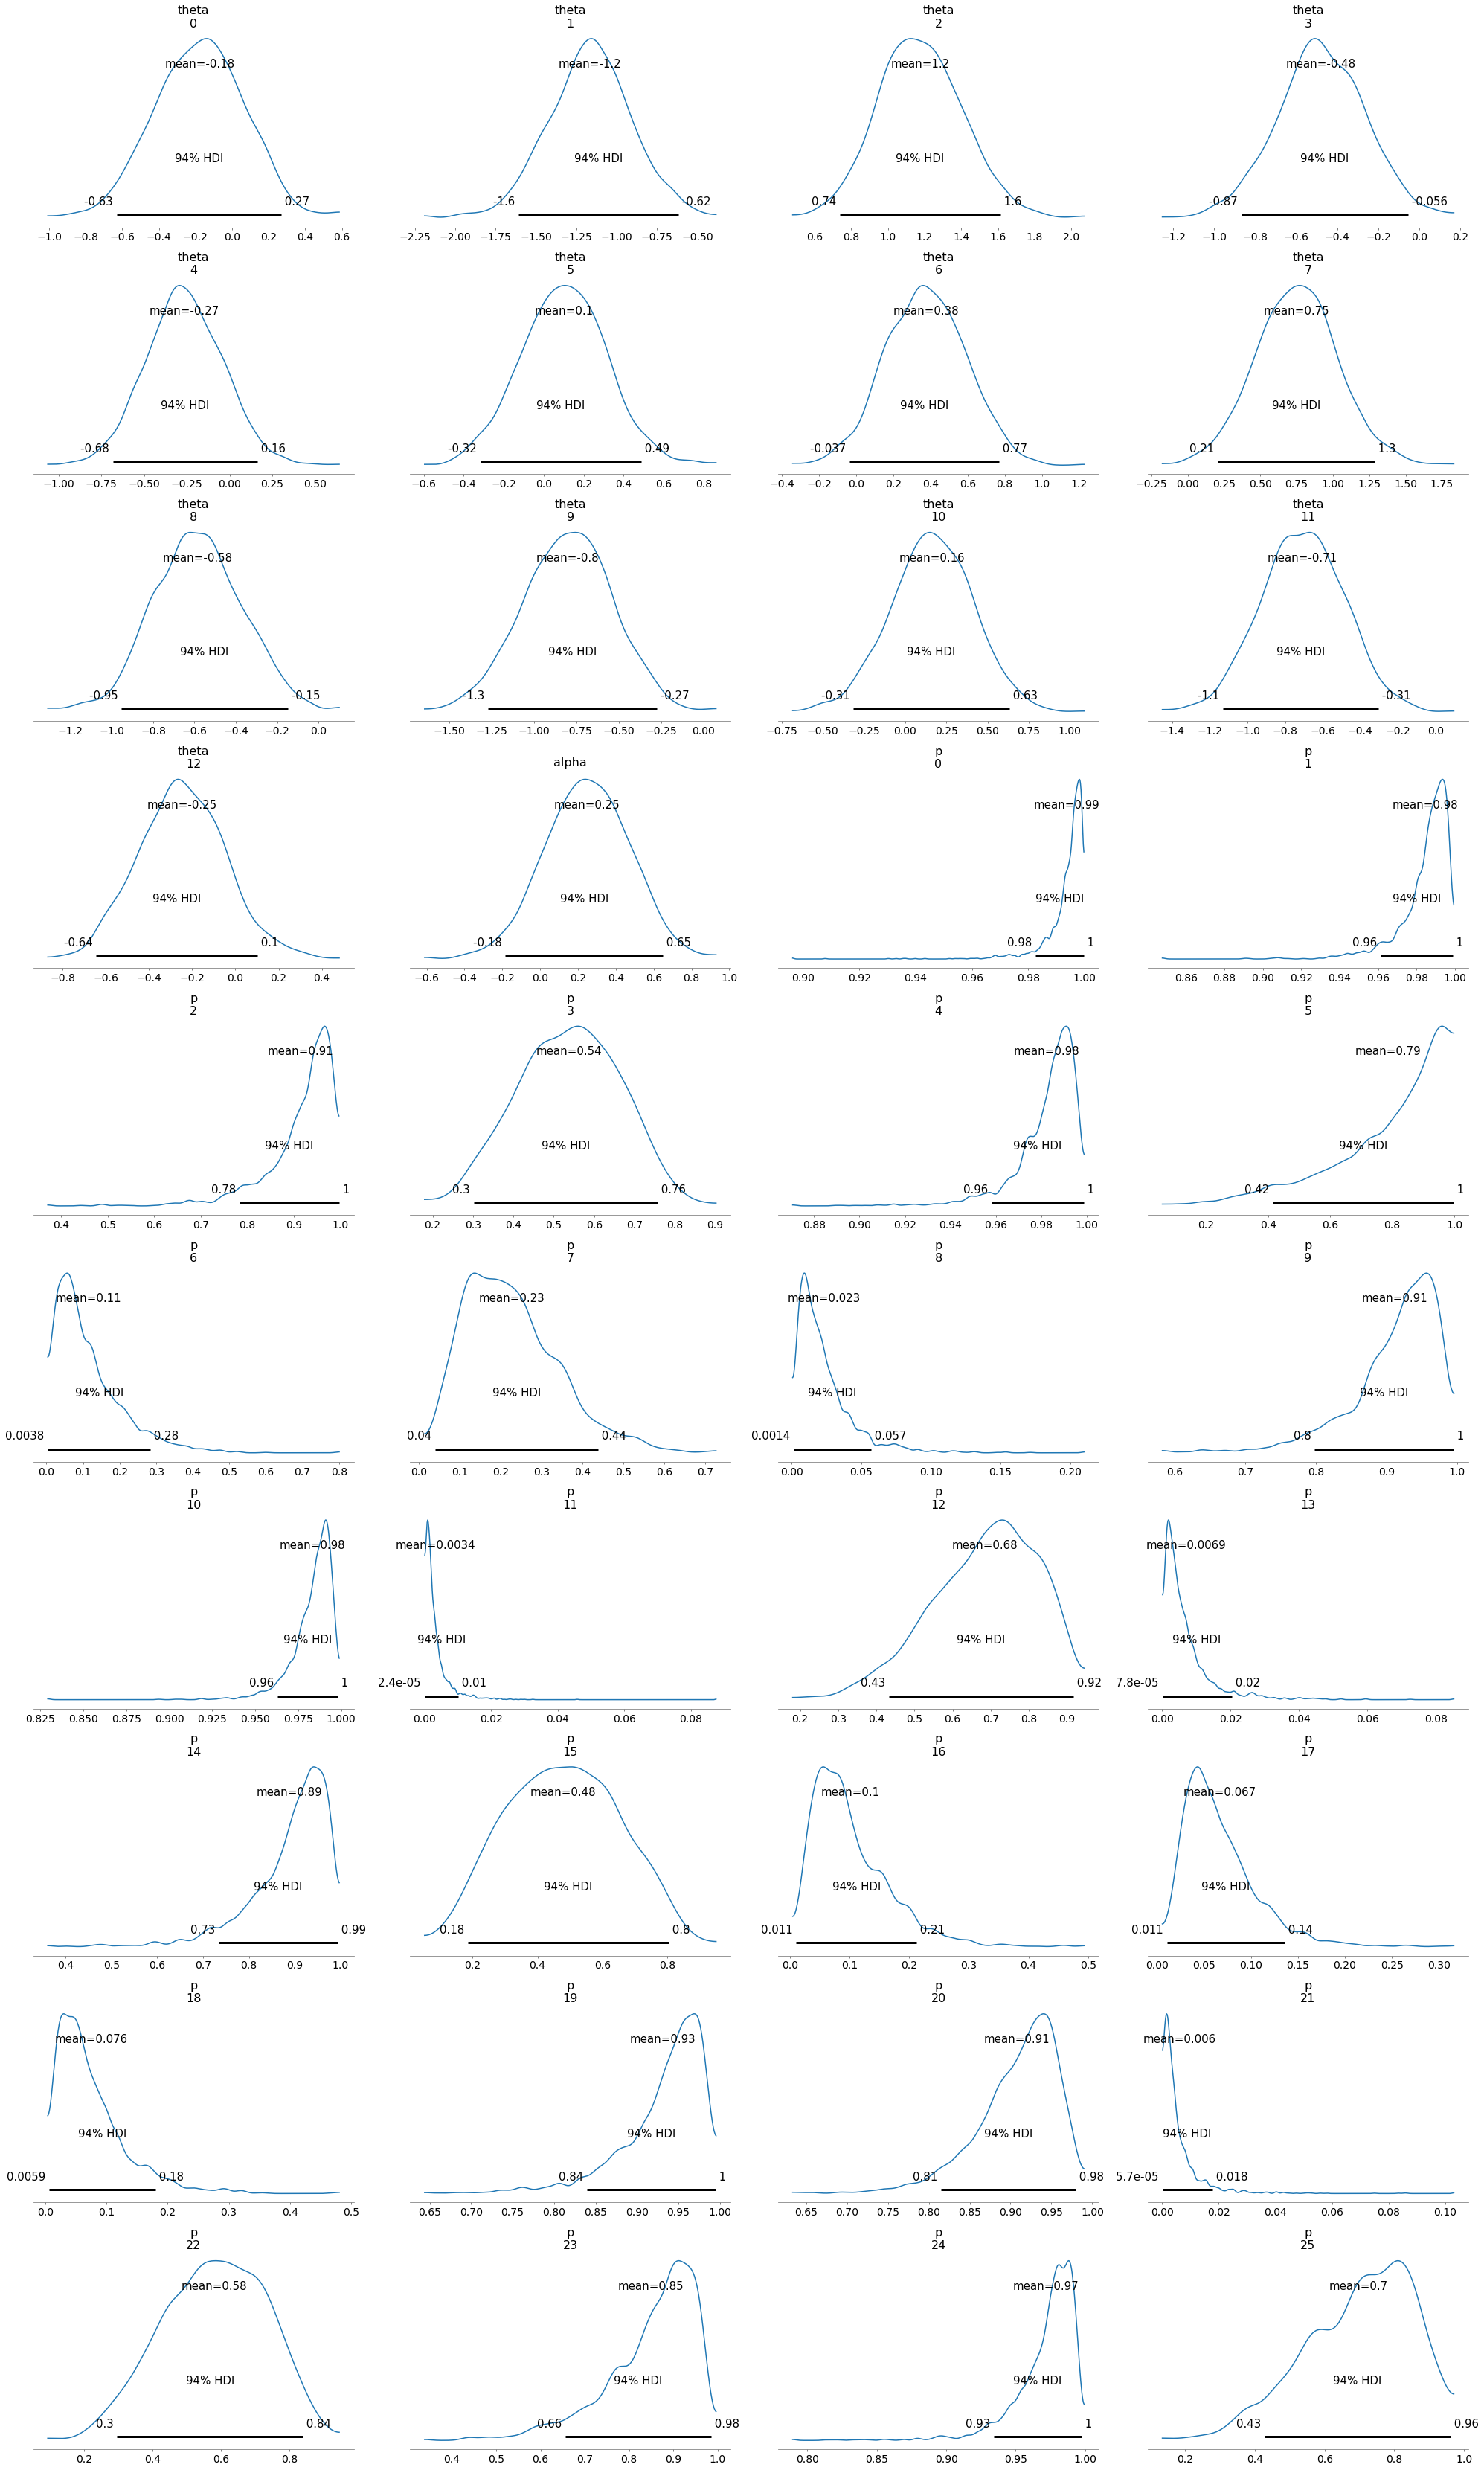

In [60]:
az.plot_posterior(trace_g)

We can now check whether the probabilistic model fits the data by using the posterior predictive check.

We assess this below by observing the Posterior predictive, Observed data, and Posterior predictive mean.

It is evident that the model fits the data well as can be seen below.

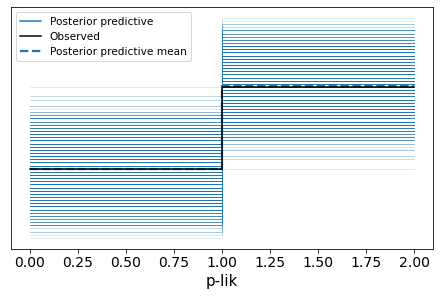

In [62]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=LRmodel));

In [67]:
# save model to disk
with open('heart_disease_model.pkl', 'wb') as buff:
    pickle.dump({'model': LRmodel, 'trace': trace_g}, buff)

# load the model from disk
with open('heart_disease_model.pkl', 'rb') as buff:
    PMLmodel = pickle.load(buff)  

PML_loadModel, PML_trace = PMLmodel['model'], PMLmodel['trace']

# Comparing Models

# Coding three models to compare probabilistic model to

## Support Vector Machine

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

**Advantages**

1. SVM works relatively well when there is a clear margin of separation between classes.
2. SVM is more effective in high dimensional spaces.
3. SVM is effective in cases where the number of dimensions is greater than the number of samples.
4. SVM is relatively memory efficient
<br/>
<br/>



**Disadvantages**
1. SVM algorithm is not suitable for large data sets.
2. SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
3. In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
4. As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

In [68]:
from sklearn.svm import SVC
model1= SVC(random_state=1)
model1.fit(x_train, y_train)

ypred1 = model1.predict(x_test)
print('Classification Report for SVM')
print(classification_report(y_test, ypred1))

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## Decision Trees

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.


Decision Tree consists of :


Nodes : Test for the value of a certain attribute.


Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.


Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).


**Advantages of Classification with Decision Trees:**<br/>
1. Inexpensive to construct.<br/>
2. Extremely fast at classifying unknown records.<br/>
3. Easy to interpret for small-sized trees<br/>
4. Accuracy comparable to other classification techniques for many simple data sets.<br/>
5. Excludes unimportant features. <br/> <br/>
**Disadvantages of Classification with Decision Trees:**

 1. Easy to overfit. <br/>
 2. Decision Boundary restricted to being parallel to attribute axes.<br/>
 3. Decision tree models are often biased toward splits on features having a large number of levels.<br/>
 4. Small changes in the training data can result in large changes to decision logic.<br/>
 5. Large trees can be difficult to interpret and the decisions they make may seem counter intuitive.

In [69]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(x_train, y_train)
ypred2 = model2.predict(x_test)
print('Classification report for Decision Tree Classifier')
print(classification_report(y_test, ypred2))

Classification report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## KNN Classifier

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

**Advantages** <br/>
1. The algorithm is simple and easy to implement.
2. There’s no need to build a model, tune several parameters, or make additional assumptions.
3. The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section). 
<br/>
<br/>
**Disadvantages**
1. The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase

In [70]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()
model3.fit(x_train, y_train)
ypred3 = model3.predict(x_test)
print('Classification report for KNN Classifier')
print(classification_report(y_test, ypred3))

Classification report for KNN Classifier
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



### Classification report for probabilistic model

In [71]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       108
           1       0.87      0.90      0.89       134

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



As can be seen, the probabalistic model created performs well compared to the other 3 classifiers across all metrics.
The probabalistic model's benefits have already being explained above. We can note that it also performs well for both classes (has disease and does not have disease). It also has an overall acccuracy of 87% which is quite high, making it reliable. 

Probabilistic Model is also the best to use since heart disease diagnosis is a very sensitive area and requires a measurement of uncertainty for medical experts to properly consult the system when using diagnosis. This means that it provides extra caution to the diagnosis process.